In [1]:
from isochrones.starmodel_new import MultipleStarModel
from isochrones.dartmouth import Dartmouth_Isochrone

In [4]:
mod = MultipleStarModel(Dartmouth_Isochrone, [0,1])
mod.add_photometry('2mass', 'J', [(10.1, 0.02), None])
mod.add_photometry('2mass', 'H', [(9.8, 0.02), None])
mod.add_photometry('2mass', 'K', [(9.4, 0.02), None])
mod.add_photometry('NIRC2', 'J', [0, (2.5, 0.03)], relative=True)
mod._photometry

{'2mass': {'H': [(9.8, 0.02), None],
  'J': [(10.1, 0.02), None],
  'K': [(9.4, 0.02), None],
  'relative': {'H': False, 'J': False, 'K': False}},
 'NIRC2': {'J': [0, (2.5, 0.03)], 'relative': {'J': True}}}

In [6]:
p = [1, 9.8, 0.0, 150, 0.2, 0.8, 9.8, 0.0, 150, 0.2]
#p = [1, 0.8, 9.8, 0.0, 150, 0.2]

mod.photometry_lnlike(p)

NIRC2
({0: (inf, 0), 1: (2.5, 0.030000000000000006)}, {0: inf, 1: 1.3201766515204945})
2mass
({0: (9.8000000000000007, 0.020000000000000046), 1: (inf, 0)}, {0: 10.300628189468249, 1: 11.620804840988741})
({0: (9.4000000000000004, 0.020000000000000046), 1: (inf, 0)}, {0: 10.300628189468249, 1: 11.620804840988741})
({0: (10.1, 0.020000000000000046), 1: (inf, 0)}, {0: 10.300628189468249, 1: 11.620804840988741})


nan

In [6]:
for obs in mod._photometry.keys():
    print mod._photometry[obs]

{'relative': {'J': True}, 'J': [0, 2.5]}
{'relative': {'H': False, 'K': False, 'J': False}, 'H': [9.8, None], 'K': [9.4, None], 'J': [10.1, None]}


In [4]:
1 - 10**(-0.4*0.02)

0.01825205698001564

In [6]:
%timeit ['a','b',(0,0)].index((0,0))

The slowest run took 12.48 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 478 ns per loop


In [6]:
10**(-0.4*11)

3.9810717055349695e-05

In [1]:
from isochrones.starmodel_new import addmags

In [4]:
addmags((10,0.05),(12,0.05), (14,0.1))

(0.00011836081835612069, 4.5622743291884723e-06, 0.03854547807756474)


(9.8169801018860063, 0.042678134115620089)

In [43]:
-2.5*np.log10(1 - 0.0318)

0.035087304237822893

In [30]:
10**(-0.4 * 0.02)

0.9817479430199844

(1e-07, 1e-05)

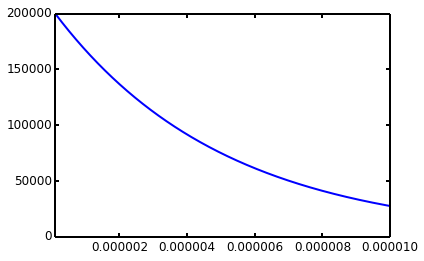

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

lmin, lmax = 1e-7, 1e-4
def prior(lam):
    #if lam < lmin or lam > lmax:
    #    return 0
    return 1./lam

def like(lam):
    return lam*2e5 * np.exp(-lam*2e5)

def prob(lam):
    return prior(lam)*like(lam)

lams = np.logspace(-7, -4, 10000)
post = prob(lams)

Z = np.trapz(post, lams)

plt.plot(lams, post/Z)
plt.xlim(1e-7, 1e-5)
